In [ ]:
!pip install tensorflow_addons

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('gdrive/My Drive/4brain/capstone')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, metrics, callbacks
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow_addons.metrics import F1Score 


import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!unzip single_bees.zip

Streaming output truncated to the last 5000 lines.
  inflating: single_bees/bee_imgs/038_115.png  
  inflating: __MACOSX/single_bees/bee_imgs/._038_115.png  
  inflating: single_bees/bee_imgs/015_1194.png  
  inflating: __MACOSX/single_bees/bee_imgs/._015_1194.png  
  inflating: single_bees/bee_imgs/030_715.png  
  inflating: __MACOSX/single_bees/bee_imgs/._030_715.png  
  inflating: single_bees/bee_imgs/011_025.png  
  inflating: __MACOSX/single_bees/bee_imgs/._011_025.png  
  inflating: single_bees/bee_imgs/046_047.png  
  inflating: __MACOSX/single_bees/bee_imgs/._046_047.png  
  inflating: single_bees/bee_imgs/031_089.png  
  inflating: __MACOSX/single_bees/bee_imgs/._031_089.png  
  inflating: single_bees/bee_imgs/004_160.png  
  inflating: __MACOSX/single_bees/bee_imgs/._004_160.png  
  inflating: single_bees/bee_imgs/005_373.png  
  inflating: __MACOSX/single_bees/bee_imgs/._005_373.png  
  inflating: single_bees/bee_imgs/005_415.png  
  inflating: __MACOSX/single_bees/bee_imgs/

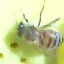

In [ ]:
single_bees_dir = "single_bees/"
#64x64 for faster training
picture = image.load_img(single_bees_dir + 'bee_imgs/041_073.png', target_size=(64,64))
picture

In [ ]:
df = pd.read_csv(single_bees_dir + 'bee_data.csv')
df.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [ ]:
#create a list to hold the 4d image tensors data
X_pics = [image.load_img(single_bees_dir + 'bee_imgs/' + img_name, target_size=(64,64)) for img_name in df["file"]]
X_pics[:10]

[<PIL.Image.Image image mode=RGB size=64x64 at 0x7F562155FFD0>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x7F5621618450>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x7F5621618490>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x7F562162DC90>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x7F562162DFD0>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x7F5621562810>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x7F5621562F90>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x7F562156F1D0>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x7F562156F250>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x7F5621562B10>]

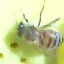

In [ ]:
X_pics[2]

In [ ]:
#a list of np tensors
X = [np.array(image.img_to_array(i)) for i in X_pics]
X[0]

array([[[215., 240., 166.],
        [214., 239., 163.],
        [205., 228., 152.],
        ...,
        [233., 255., 190.],
        [235., 255., 190.],
        [235., 254., 191.]],

       [[215., 243., 168.],
        [216., 244., 169.],
        [217., 245., 168.],
        ...,
        [232., 255., 189.],
        [234., 255., 189.],
        [234., 253., 190.]],

       [[216., 246., 170.],
        [217., 250., 173.],
        [220., 253., 176.],
        ...,
        [232., 255., 189.],
        [234., 255., 189.],
        [234., 253., 190.]],

       ...,

       [[124., 119., 118.],
        [128., 122., 127.],
        [117., 111., 116.],
        ...,
        [176., 193., 167.],
        [155., 173., 130.],
        [154., 170.,  97.]],

       [[133., 128., 127.],
        [127., 121., 126.],
        [ 99.,  93.,  98.],
        ...,
        [199., 219., 192.],
        [160., 178., 135.],
        [166., 181., 115.]],

       [[125., 123., 121.],
        [122., 119., 123.],
        [ 92.,  

In [ ]:
#rescale for training, using minmax scaling
X = [i/255.0 for i in X]
X[0]

array([[[0.84313726, 0.9411765 , 0.6509804 ],
        [0.8392157 , 0.9372549 , 0.6392157 ],
        [0.8039216 , 0.89411765, 0.59607846],
        ...,
        [0.9137255 , 1.        , 0.74509805],
        [0.92156863, 1.        , 0.74509805],
        [0.92156863, 0.99607843, 0.7490196 ]],

       [[0.84313726, 0.9529412 , 0.65882355],
        [0.84705883, 0.95686275, 0.6627451 ],
        [0.8509804 , 0.9607843 , 0.65882355],
        ...,
        [0.9098039 , 1.        , 0.7411765 ],
        [0.91764706, 1.        , 0.7411765 ],
        [0.91764706, 0.99215686, 0.74509805]],

       [[0.84705883, 0.9647059 , 0.6666667 ],
        [0.8509804 , 0.98039216, 0.6784314 ],
        [0.8627451 , 0.99215686, 0.6901961 ],
        ...,
        [0.9098039 , 1.        , 0.7411765 ],
        [0.91764706, 1.        , 0.7411765 ],
        [0.91764706, 0.99215686, 0.74509805]],

       ...,

       [[0.4862745 , 0.46666667, 0.4627451 ],
        [0.5019608 , 0.47843137, 0.49803922],
        [0.45882353, 0

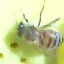

In [ ]:
#verified to be in order. Should be identical to the picture above
X_pics[2] #third picture

In [ ]:
#summary of the target/labels
print(df['health'].value_counts(normalize=True))

healthy                       0.654292
few varrao, hive beetles      0.111949
Varroa, Small Hive Beetles    0.091261
ant problems                  0.088360
hive being robbed             0.048531
missing queen                 0.005607
Name: health, dtype: float64


In [ ]:
y = df['health']

labels = y.unique()
labels = labels.tolist()
labels

['hive being robbed',
 'healthy',
 'few varrao, hive beetles',
 'ant problems',
 'missing queen',
 'Varroa, Small Hive Beetles']

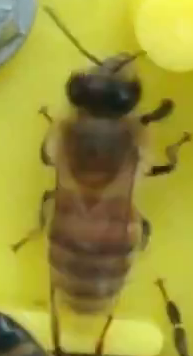

In [ ]:
image.load_img(single_bees_dir + 'bee_imgs/034_032.png') #Missing queen

In [ ]:
#doing a label assignment by using a sparse matrix
#we can also utilize the keras util library for this task

df['health'] = np.where(df['health']=='few varrao, hive beetles', 'varroa beetles', df['health'])
df['health'] = np.where(df['health']=='Varroa, Small Hive Beetles', 'varroa beetles', df['health'])

y_keys = {
        "healthy":np.array([1, 0, 0, 0, 0]),
        "varroa beetles":np.array([0, 1, 0, 0, 0]),
        "ant problems":np.array([0, 0, 1, 0, 0]),
        "hive being robbed":np.array([0, 0, 0, 1, 0]),
        "missing queen":np.array([0, 0, 0, 0, 1])
    }
y_tmp = [y_keys[i] for i in df.health]

label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y)
y_ohe = keras.utils.to_categorical(y_int, num_classes=len(np.unique(y_int)))
y_ohe

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
y_ohe = [np.asarray(x) for x in y_ohe.tolist()]
y_ohe

[array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0.]),
 array([0.

In [ ]:
y_ohe = y_tmp

In [ ]:
#helper function
#input as 1 type of target only, return some random indices for image showing
def random_imgs(df, num_images, X_pics):
    index_lst = df["file"].sample(n=num_images, random_state=1).index
    image_lst = []
    for i in index_lst:
        image_lst.append(X_pics[i])
    return image_lst

In [ ]:
healthy = random_imgs(df[df["health"]=="healthy"], 4, X_pics)
hive_beetles = random_imgs(df[df["health"]=="varroa beetles"], 4, X_pics)
ant_probs = random_imgs(df[df["health"]=="ant problems"], 4, X_pics)
hive_robbed = random_imgs(df[df["health"]=="hive being robbed"], 4, X_pics)
missing_q = random_imgs(df[df["health"]=="missing queen"], 4, X_pics)

In [ ]:
missing_q

[<PIL.Image.Image image mode=RGB size=64x64 at 0x7F56213309D0>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x7F5621330D50>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x7F5621330BD0>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x7F5621330CD0>]

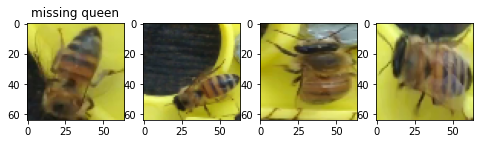

In [ ]:
#only plot 2x2 images. Helper function
def plot_bees(img_lst,title):
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(8,8))
    ax[0].imshow(img_lst[0])
    ax[0].set_title(title)
    ax[1].imshow(img_lst[1])
    ax[2].imshow(img_lst[2])
    ax[3].imshow(img_lst[3])
    
    plt.show()
    
plot_bees(missing_q, 'missing queen')

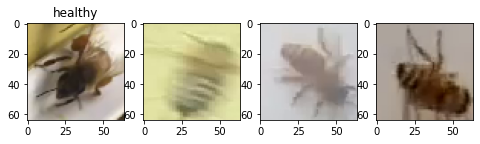

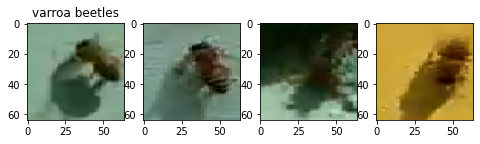

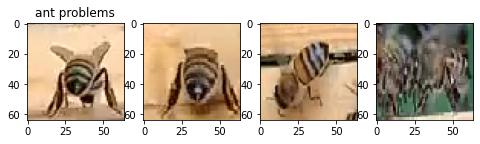

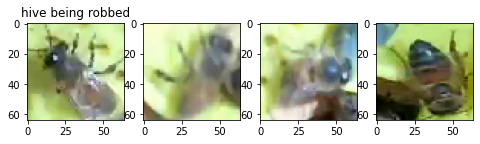

In [ ]:
plot_bees(healthy,"healthy")
plot_bees(hive_beetles,"varroa beetles")
plot_bees(ant_probs,"ant problems")
plot_bees(hive_robbed,"hive being robbed")

In [ ]:
model = models.Sequential([
    layers.Convolution2D(11, (3, 3), input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'),
    layers.Convolution2D(21, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2), padding="SAME"),
    # third convo layer with more feature filter size, 41 for better detection.
    layers.Convolution2D(41, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2), padding="SAME"),
    # flattening to input the fully connected layers
    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy", metrics.Precision(), metrics.Recall(), F1Score(num_classes=5)]
)

In [ ]:
#splitting into train,test, val datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=.2, stratify=y, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, stratify=y_train, random_state=1)

In [ ]:
history = callbacks.History()

In [ ]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    validation_data=(np.array(X_val), np.array(y_val)),
    verbose=True,
    shuffle=True,
    epochs=50
)

Epoch 1/50
104/104 [==============================] - 12s 97ms/step - loss: 0.6721 - accuracy: 0.7981 - precision: 0.8306 - recall: 0.7634 - f1_score: 0.4950 - val_loss: 1.5654 - val_accuracy: 0.6582 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.1657
Epoch 2/50
104/104 [==============================] - 10s 94ms/step - loss: 0.2991 - accuracy: 0.9024 - precision: 0.9191 - recall: 0.8891 - f1_score: 0.6611 - val_loss: 1.4215 - val_accuracy: 0.7101 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.2564
Epoch 3/50
104/104 [==============================] - 10s 92ms/step - loss: 0.1963 - accuracy: 0.9323 - precision: 0.9407 - recall: 0.9248 - f1_score: 0.7778 - val_loss: 0.8730 - val_accuracy: 0.7645 - val_precision: 0.8534 - val_recall: 0.4360 - val_f1_score: 0.3229
Epoch 4/50
104/104 [==============================] - 10s 92ms/step - loss: 0.1309 - accuracy: 0.9559 - precision: 0.9618 - recall: 0.9516 - f1_score: 0.8791 - val_loss: 0.5304 - v

In [ ]:
def model_plot(history, epochs, title, y_range=[.5, 1], save=False):
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
   
    plt.plot([i for i in range(0, epochs)], train_loss, val_loss)
    plt.legend(['Train Loss', 'Val Loss'])
    plt.title(title)
    
    if save:
      plt.savefig(title + '_loss.jpg')
    plt.show()
      
    plt.plot([i for i in range(0, epochs)], train_accuracy, val_accuracy)
    plt.legend(['Train Accuracy', 'Val Accuracy'])
    plt.title(title)
    plt.ylim(y_range)
    
    if save:
        plt.savefig(title + '_accuracy.jpg')
    plt.show()

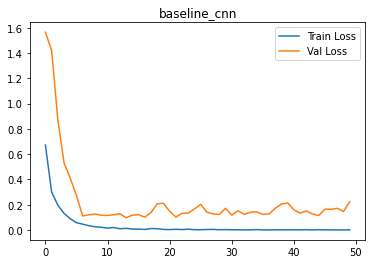

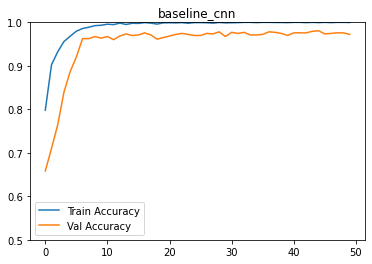

In [ ]:
model_plot(history, epochs=len(history.epoch), title="baseline_cnn")

In [ ]:
model.save('bee_health_detection')

INFO:tensorflow:Assets written to: bee_health_detection/assets


In [ ]:
ls

bee_health_classification.ipynb  __MACOSX/     single_bees.zip
bee_health_detection/            single_bees/


In [ ]:
model.save('../models/my_model')

INFO:tensorflow:Assets written to: ../models/my_model/assets


In [ ]:
ls

bee_health_classification.ipynb  __MACOSX/     single_bees.zip
bee_health_detection/            single_bees/


In [ ]:
!zip -r bee_health_detection.zip bee_health_detection

  adding: bee_health_detection/ (stored 0%)
  adding: bee_health_detection/variables/ (stored 0%)
  adding: bee_health_detection/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: bee_health_detection/variables/variables.index (deflated 70%)
  adding: bee_health_detection/assets/ (stored 0%)
  adding: bee_health_detection/saved_model.pb (deflated 89%)
  adding: bee_health_detection/keras_metadata.pb (deflated 92%)


In [ ]:
from google.colab import files
files.download("bee_health_detection.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.evaluate(np.array(X_test), np.array(y_test))

33/33 [==============================] - 1s 35ms/step - loss: 0.1670 - accuracy: 0.9710 - precision: 0.9710 - recall: 0.9710 - f1_score: 0.9248


[0.1669607311487198,
 0.9710144996643066,
 0.9710144996643066,
 0.9710144996643066,
 array([0.9782609 , 0.95781636, 0.9945355 , 0.893617  , 0.8       ],
       dtype=float32)]

In [ ]:
t = np.array(image.img_to_array(image.load_img(single_bees_dir + 'bee_imgs/004_430.png', target_size=(64,64)))) / 255
t = t.reshape(1, 64, 64, 3)

In [ ]:
np.argmax(model.predict(t))

0

In [ ]:
np.amax(model.predict(t))

1.0

In [ ]:
df[df['file']=='013_023.png']

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
3701,013_023.png,8/18/18,12:36,"Alvin, TX, USA",77511,Italian honey bee,ant problems,False,worker


In [ ]:
model.layers[0].input_shape

(None, 64, 64, 3)